# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

# Building a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


## PACE: Plan 


### **Imports and data loading**

Importing packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Importing packages and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [2]:
# Running this cell to see all colums 
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspecting the first few rows of `df0`.


In [4]:
# Inspecting the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspecting the first few rows of `nyc_preds_means`.

In [5]:
# Inspecting the first few rows of `nyc_preds_means`
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes


In [6]:
# Merging datasets
df0 = df0.merge(nyc_preds_means,
                left_index=True,
                right_index=True)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


## PACE: **Analyze**


### **Feature engineering**

Calling `info()` on the new combined dataframe.

In [7]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


From the EDA, customers who pay cash generally have a tip amount of $0. To meet the modeling objective, I'll need to sample the data to select only the customers who pay with credit card. 


In [11]:
# Subseting the data to isolate only customers who paid by credit card
df1 = df0[df0['payment_type']==1]

In [12]:
# Rounding the result to three places beyond the decimal.
1.1 + 2.2

3.3000000000000003

In [13]:
# Creating tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)


Now, I'll create another column called `generous`. This will be the target variable. The column will be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

In [14]:
# Creating 'generous' col (target)
df1['generous'] = df1["tip_percent"]
df1['generous'] = (df1['generous'] >=0.2)
df1['generous'] = df1['generous'].astype(int)

Converting the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [15]:
# Converting pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

Creating a `day` column that contains only the day of the week when each passenger was picked up. 

In [16]:
# Creating a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

I'll engineer four new columns that represent time of day bins. Each column will contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  


In [17]:
# Creaing'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour


Writing four functions to convert each new column to binary (0/1). I'll begin with `am_rush`.

In [18]:
# Defining 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
       val = 1
    else:
        val = 0
    return val

In [19]:
# Applying 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [20]:
# Defining 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [21]:
# Applying 'daytime()' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [22]:
# Defining 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val



In [23]:
# Applying 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)


In [24]:
# Defining 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [25]:
# Applying 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

Now, I'll create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [26]:
# Creat ing'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examining the first few rows of your dataframe.

In [27]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


#### Drop columns

Droping redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) will remain in the data because it will get isolated as the `y` data for modeling.

In [28]:
# Dropping columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, I first need to convert them to `type(str)`. 

1. I'll define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. I'll write a for loop that converts each column in `cols_to_str` to string.


In [29]:
# 1. Defining list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Converting each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')


Converting all the categorical columns to binary.



In [30]:
# Converting categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int64(6), uint8(338)
memory usage: 6.1 MB


In [31]:
# Getting class balance of 'generous' col
df2['generous'].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generous, dtype: float64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

In order to determine a metric, I'll consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

The stakes are relatively even. I want to help taxi drivers make more money, but I don't want this to anger customers. My metric should weigh both precision and recall equally.

## PACE: **Construct**


### **Modeling**

In [32]:
# Isolating target variable (y)
y = df2['generous']

# Isolating the features (X)
X = df2.drop('generous', axis=1)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


##### **Random forest**



In [34]:
# Instantiating the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Creating a dictionary of hyperparameters to tune 
cv_params ={'max_depth': [None],
            'max_features': [1.0],
            'max_samples': [0.7],
            'min_samples_leaf': [1],
            'min_samples_split': [2],
            'n_estimators': [300]
            }

# Defining a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiating the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')


    Fitting the model to the training data.

In [37]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 3min 49s, sys: 75.9 ms, total: 3min 49s
Wall time: 3min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

Using `pickle` to save my models and reading them back in.

In [39]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [40]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [41]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examining the best average score across all the validation folds. 

In [42]:
# Examining best score
rf1.best_score_

0.7136009788848705

Examining the best combination of hyperparameters.

In [43]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Using the `make_results()` function to output all of the scores of my model.

In [45]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [46]:
# Calling 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results


,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233


This is an acceptable model across the board. 

In [49]:
# Getting scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

Using the `get_test_scores()` function to output the scores of the model on the test data.


In [50]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

###### RF test results

In [52]:
 # Getting scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538


All scores increased by at most ~0.02.

##### **XGBoost**

 Improving my scores using an XGBoost model.


In [54]:
# Instantiating the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Creating a dictionary of hyperparameters to tune
cv_params ={'learning_rate': [0.1],
            'max_depth': [8],
            'min_child_weight': [2],
            'n_estimators': [500]
           }

# Defining a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiating the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Fitting the model to the `X_train` and `y_train` data.

In [55]:
%%time
xgb1.fit(X_train, y_train)


CPU times: user 6min 36s, sys: 559 ms, total: 6min 37s
Wall time: 3min 18s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

Getting the best score from this model.

In [56]:
# Examining best score
xgb1.best_score_

0.6977560172278552

Getting the best combination of hyperparameters.

In [57]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Using the `make_results()` function to output all of the scores of your model. 

In [59]:
# Calling 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.673074,0.724487,0.697756,0.669669


Using my model to predict on the test data. Assigning the results to a variable called `xgb_preds`.


In [60]:
# Getting scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results


In [62]:
# Getting scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.673074,0.724487,0.697756,0.669669
0,XGB test,0.675660,0.747978,0.709982,0.678349


The F1 score is slightly lower by approximately 0.01 compared to the random forest model. While both models meet the acceptable criteria, the random forest model takes the lead as the preferred choice.

Plotting a confusion matrix of the model's predictions on the test data.

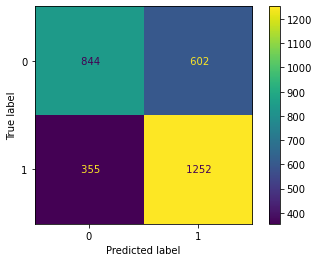

In [65]:
# Generating array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels = rf1.classes_)


# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_,
                              )
disp.plot(values_format = ' ');


The chart displays the comparison between false positive and false negative predictions in a driver tip prediction model. The model is approximately twice as likely to make false positive predictions compared to false negatives, indicating a tendency to overpredict higher tips.

While this preference for false positives might be less desirable, the model's overall performance remains acceptable. It can still predict driver tips with reasonable accuracy, even though it leans towards overpredicting generous tips, which can sometimes be more favorable for drivers.

##### Feature importance


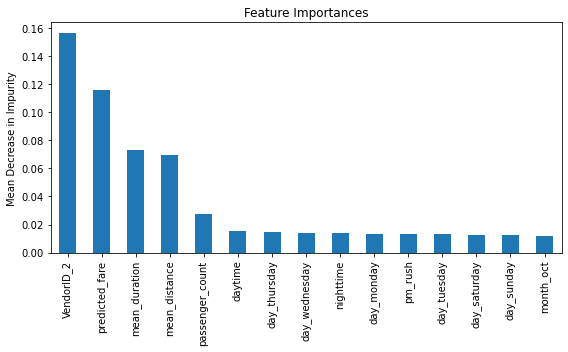

In [68]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout();

The graph shows that the most important features for predicting employee turnover are: Number of projects worked on, Average monthly hours worked, Department, Salary, Job satisfaction, & Last evaluation score

This suggests that employees who are working on a large number of projects, working long hours, and have low job satisfaction are more likely to leave the company. Additionally, employees in certain departments, such as sales or engineering, may be more likely to leave due to the competitive nature of these industries.


## PACE: **Execute**


### **Summary of the model results**

The model at hand is a viable solution for predicting taxi trip fares with acceptable performance. It achieved an F1 score of 0.7235 and an overall accuracy of 0.6865. Notably, it correctly identified approximately 78% of actual responders in the test set, significantly outperforming random guessing by 48%.


### **Conclusion, Recommendations, & Next steps**

The highest-scoring model, the Random Forest, excelled in predictive accuracy. However, the model's black-box nature presents a challenge in interpreting how specific features influence tipping behavior. The importance of features like VendorID, predicted_fare, mean_duration, and mean_distance is clear, but the nuances of their impact on tipping remain unclear. Further exploration is needed to understand these relationships better. It's particularly intriguing that VendorID is the most predictive feature, suggesting that certain vendors may attract more generous customers. Conducting statistical tests on different vendors could shed light on this phenomenon.

To enhance model performance, several potential new features could be engineered. These include categorizing trips into short, medium, or long distances and introducing a feature that represents the ratio of the amount of money from the fare amount to the nearest higher multiple of  \\$5 divided by the fare amount. Such features may capture customers' tendencies to round up their tips, potentially impacting tip percentages for fares just under or over multiples of  \\$5. Similar features could be created for fares rounded to the nearest  \\$10.

However, there are limitations. The absence of historical data on tipping behavior for individual customers and accurate tip values for cash payments hinders the model's capacity to fine-tune predictions. Moreover, a more extensive dataset would enhance the model's ability to create unique features for each pickup/dropoff combination.